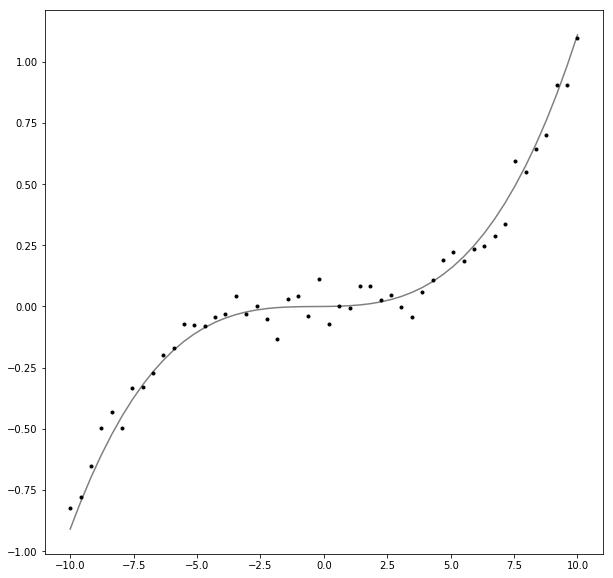

In [8]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.linspace(-10, 10, 50)
Y_gt = 0.001 * (X **3 + X**2 + X)
Y = Y_gt + np.random.normal(0, 0.05, len(X))

poly = PolynomialFeatures(degree=30, include_bias=False)
X_poly = poly.fit_transform(X[:, np.newaxis])

plt.figure(figsize=(10, 10))
plt.plot(X, Y_gt, color='gray')
plt.plot(X, Y, '.', color='k')
plt.show()

In [9]:
for _x, _y in zip(X, Y):
    print(_x, '\t', _y)

-10.0 	 -0.8217973827016168
-9.591836734693878 	 -0.7800615834358153
-9.183673469387756 	 -0.6504566358013856
-8.775510204081632 	 -0.495519620229304
-8.36734693877551 	 -0.43079578662668044
-7.959183673469388 	 -0.49767765356678767
-7.551020408163265 	 -0.3335720863613511
-7.142857142857142 	 -0.3281217962749432
-6.73469387755102 	 -0.2719989947618171
-6.326530612244898 	 -0.19899093780884353
-5.918367346938775 	 -0.170992196234772
-5.5102040816326525 	 -0.06973691921704091
-5.1020408163265305 	 -0.07382964269742258
-4.6938775510204085 	 -0.07999543386881115
-4.285714285714286 	 -0.04244240687584826
-3.8775510204081627 	 -0.030458970776948733
-3.4693877551020407 	 0.04151140633491115
-3.0612244897959187 	 -0.032635068965219734
-2.6530612244897958 	 0.001364865843112524
-2.244897959183673 	 -0.05122343140745293
-1.8367346938775508 	 -0.132309028909325
-1.4285714285714288 	 0.03037772277493348
-1.020408163265305 	 0.0421801521303292
-0.612244897959183 	 -0.03757514831651671
-0.204081632

No Regularization Model
[-748.154  893.538  853.209 -705.483 -217.155  226.767  22.323 -39.246
 -0.885  4.144 -0.018 -0.287  0.004  0.014 -0.000 -0.000  0.000  0.000
 -0.000 -0.000  0.000  0.000 -0.000 -0.000  0.000  0.000 -0.000 -0.000
  0.000  0.000]
L1
[ 0.000  6.285  9.417  0.029  0.000  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]
L2
[ 151.069  3.542  2.099  0.027  0.020  0.000  0.000  0.000  0.000  0.000
  0.000  0.000  0.000  0.000  0.000  0.000  0.000 -0.000  0.000 -0.000
 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000  0.000]


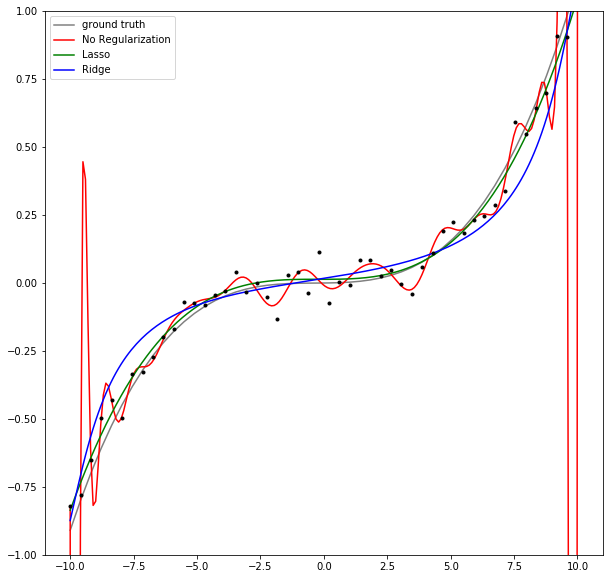

In [10]:
xs = np.linspace(-10, 10, 200)
from sklearn import linear_model

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

model_plain = linear_model.LinearRegression(normalize=True)
model_plain.fit(X_poly, Y)
Y_plain = model_plain.predict(poly.fit_transform(xs[:, np.newaxis]))
print('No Regularization Model')
print(model_plain.coef_ * 10000)

model_lasso = linear_model.LassoLars(normalize=True, alpha=0.001)
model_lasso.fit(X_poly, Y)
Y_lasso = model_lasso.predict(poly.fit_transform(xs[:, np.newaxis]))
print('L1')
print(model_lasso.coef_ * 10000)

model_ridge = linear_model.Ridge(normalize=True, alpha=0.5)
model_ridge.fit(X_poly, Y)
Y_ridge = model_ridge.predict(poly.fit_transform(xs[:, np.newaxis]))
print('L2')
print(model_ridge.coef_ * 10000)

plt.figure(figsize=(10, 10))
p = plt.subplot()
p.plot(X, Y_gt, color='gray', label='ground truth')
p.plot(xs, Y_plain, color='r', markersize=2, label='No Regularization')
p.plot(xs, Y_lasso, color='g',  markersize=2, label='Lasso')
p.plot(xs, Y_ridge, color='b',  markersize=2, label='Ridge')
p.plot(X, Y, '.', color='k')
p.legend()
p.set_ylim(-1, 1)

plt.show()

In [11]:
print('x{}\t{}'.format(0, model_plain.intercept_))
for i, _c in enumerate(model_plain.coef_):
    print('x{}\t{}'.format(i+1, _c))

x0	-0.00833294230052805
x1	-0.07481543754290311
x2	0.0893538325264679
x3	0.08532085495097819
x4	-0.07054828091768552
x5	-0.021715530401990868
x6	0.022676742287700256
x7	0.002232260699437436
x8	-0.003924613685893244
x9	-8.85181831861109e-05
x10	0.00041440722551504256
x11	-1.8253234929307905e-06
x12	-2.868605415628704e-05
x13	3.6301683596156036e-07
x14	1.3621077779290314e-06
x15	-1.869525104266067e-08
x16	-4.5626354029419295e-08
x17	5.558280846885409e-10
x18	1.094290817420015e-09
x19	-1.0801613569260348e-11
x20	-1.8852231433068058e-11
x21	1.4192444148730646e-13
x22	2.311783168411805e-13
x23	-1.2544474840847517e-15
x24	-1.967494895349634e-15
x25	7.1628017865815e-18
x26	1.103694651704333e-17
x27	-2.3902998756553033e-20
x28	-3.667219908739455e-20
x29	3.544513585104906e-23
x30	5.463661771750092e-23


In [12]:
print('x{}\t{}'.format(0, model_lasso.intercept_))
for i, _c in enumerate(model_lasso.coef_):
    print('x{}\t{}'.format(i+1, _c))

x0	0.013628006605583894
x1	0.0
x2	0.0006285493263064418
x3	0.0009416788310082306
x4	2.9033441293946514e-06
x5	0.0
x6	0.0
x7	0.0
x8	0.0
x9	0.0
x10	0.0
x11	0.0
x12	0.0
x13	0.0
x14	0.0
x15	0.0
x16	0.0
x17	0.0
x18	0.0
x19	0.0
x20	0.0
x21	0.0
x22	0.0
x23	0.0
x24	0.0
x25	0.0
x26	0.0
x27	0.0
x28	0.0
x29	0.0
x30	0.0


In [13]:
print('x{}\t{}'.format(0, model_ridge.intercept_))
for i, _c in enumerate(model_ridge.coef_):
    print('x{}\t{}'.format(i+1, _c))

x0	0.01687280744351844
x1	0.015106885412395946
x2	0.0003542251590413082
x3	0.0002099202254983093
x4	2.6567980630229423e-06
x5	1.973330824510639e-06
x6	2.0059186842515963e-08
x7	1.6482115931027678e-08
x8	1.459787162840241e-10
x9	1.2997922104068478e-10
x10	9.873100437979217e-13
x11	9.821359901488078e-13
x12	5.9775018554088006e-15
x13	7.080597467720812e-15
x14	2.980043150705457e-17
x15	4.7650473830194024e-17
x16	8.481199549987226e-20
x17	2.822501196487165e-19
x18	-5.185606307330121e-22
x19	1.194188618691298e-21
x20	-1.2467811825587473e-23
x21	-1.7341062427214627e-24
x22	-1.4637349496930528e-25
x23	-1.3255695386927883e-25
x24	-1.2843438631109476e-27
x25	-2.2994922590091544e-27
x26	-8.067089142758635e-30
x27	-3.125455809708562e-29
x28	-1.1173965241638469e-32
x29	-3.8280830344353173e-31
x30	7.353519766159866e-34
